# Netflix Exploratory Data Analysis

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading the Dataset

In [2]:
Netflix = pd.read_csv('netflix.csv')
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
Netflix.shape

(8807, 12)

In [4]:
Netflix.size

105684

In [5]:
Netflix.count()

,0
show_id,8807
type,8807
title,8807
director,6173
cast,7982
country,7976
date_added,8797
release_year,8807
rating,8803
duration,8804


## Analysis of Movies vs TV Shows

/tmp/ipython-input-3178745707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=Netflix, palette=sns.color_palette("RdYlBu", 12))
/tmp/ipython-input-3178745707.py:3: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(x="type", data=Netflix, palette=sns.color_palette("RdYlBu", 12))


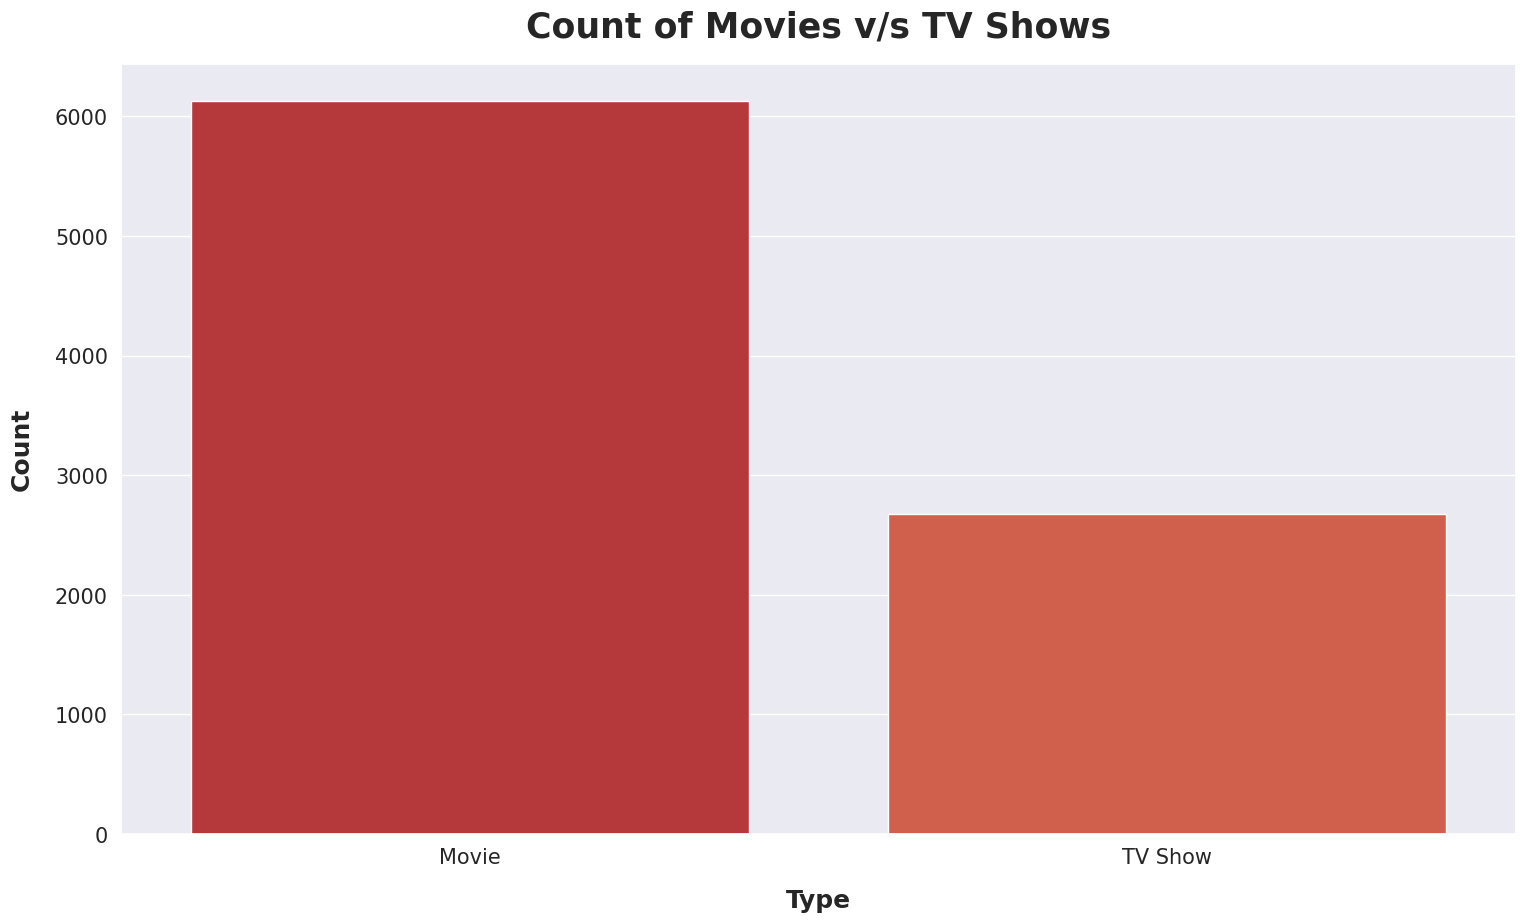

In [6]:
sns.set(style="darkgrid")
plt.figure(figsize=(18, 10), dpi=100)
sns.countplot(x="type", data=Netflix, palette=sns.color_palette("RdYlBu", 12))
plt.title("Count of Movies v/s TV Shows", fontsize=25, fontweight="bold", position=(0.5, 1), pad=20)
plt.xlabel("Type", fontsize=18, fontweight="bold", labelpad=15)
plt.ylabel("Count", fontsize=18, fontweight="bold", labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Movie Ratings Analysis

In [7]:
netflix_movies = Netflix[Netflix["type"] == "Movie"]
netflix_shows = Netflix[Netflix["type"] == "TV Show"]

/tmp/ipython-input-190041330.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




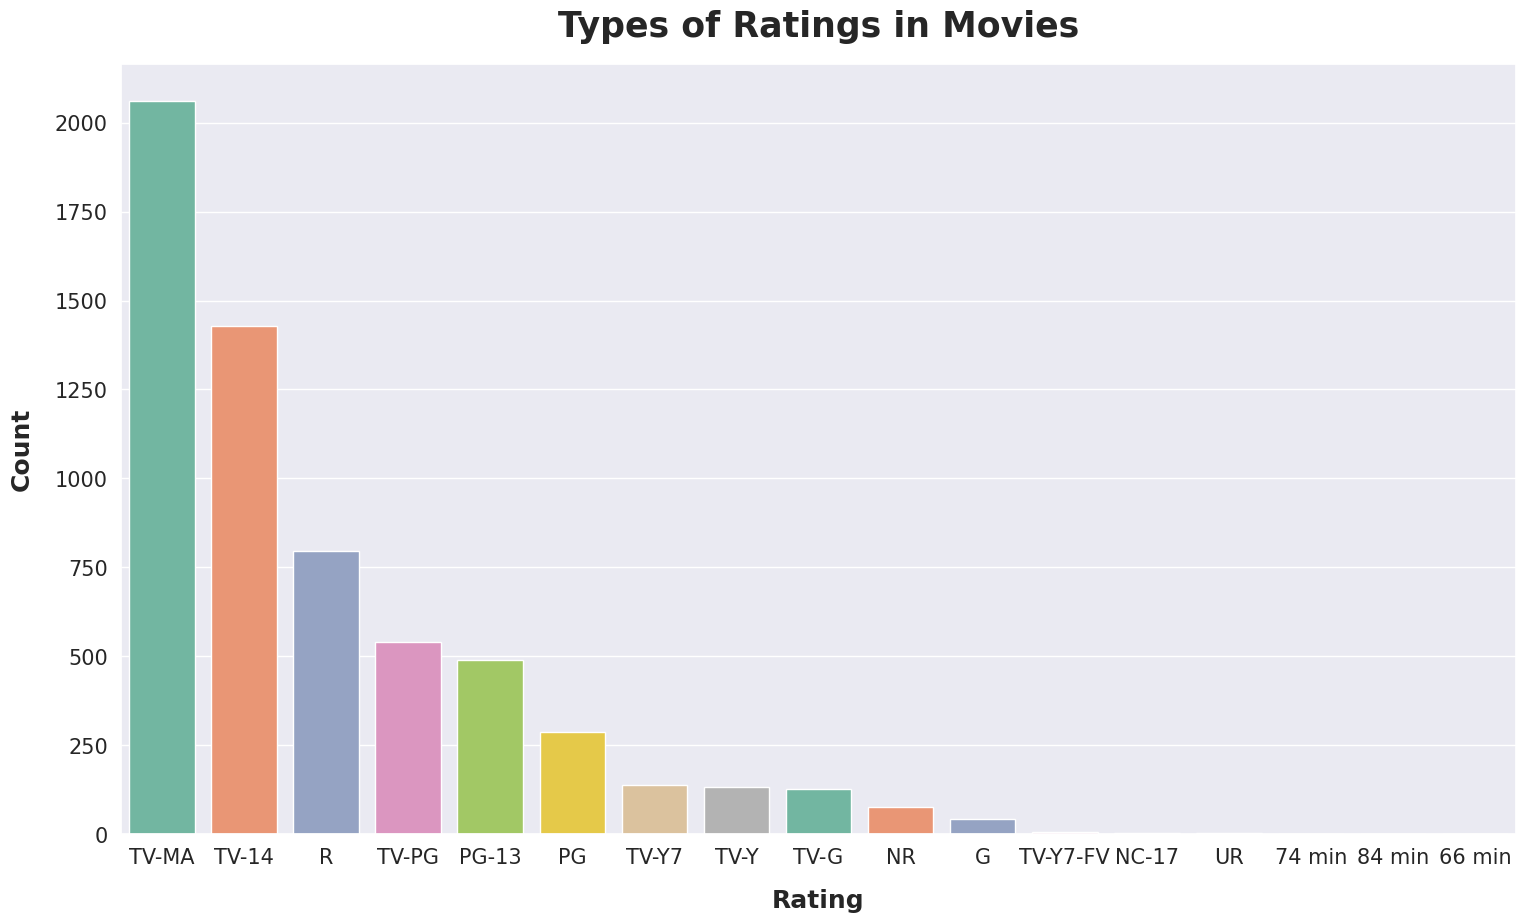

In [43]:
netflix_movies = Netflix[Netflix["type"] == "Movie"]
sns.set(style="darkgrid")
plt.figure(figsize=(18, 10), dpi=100)
sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts(ascending=False).index)
plt.title("Types of Ratings in Movies", fontsize=25, fontweight="bold", position=(0.5, 1), pad=20)
plt.xlabel("Rating", fontsize=18, fontweight="bold", labelpad=15)
plt.ylabel("Count", fontsize=18, fontweight="bold", labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Netflix Contents Update

In [9]:
netflix_shows = Netflix[Netflix["type"] == "TV Show"]
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
# string = "   Septemper 25, 2002"
# print(string.lstrip())
# Returns Septemper 25, 2002 without spaces in left.
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

In [10]:
df = netflix_date.groupby('year')
df

In [11]:
df = netflix_date.groupby('year')['month']
df

In [12]:
df = netflix_date.groupby('year')['month'].value_counts()
df

year  month    
2008  February      1
2013  October       2
      August        1
      March         1
      September     1
                   ..
2021  April        53
      February     44
      May          38
      March        37
      January      36
Name: count, Length: 88, dtype: int64

In [13]:
df = netflix_date.groupby('year')['month'].value_counts().unstack()
df

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2008,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,1.0
2014,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2015,4.0,NaN,7.0,1.0,NaN,2.0,2.0,2.0,1.0,2.0,4.0,1.0
2016,8.0,11.0,44.0,6.0,28.0,9.0,7.0,3.0,4.0,18.0,19.0,19.0
2017,27.0,38.0,38.0,17.0,14.0,34.0,29.0,38.0,23.0,30.0,29.0,32.0
2018,28.0,34.0,61.0,24.0,24.0,27.0,28.0,35.0,27.0,36.0,45.0,43.0
2019,43.0,44.0,47.0,45.0,37.0,59.0,46.0,53.0,48.0,68.0,65.0,37.0
2020,50.0,47.0,68.0,42.0,53.0,43.0,41.0,44.0,52.0,51.0,51.0,53.0


In [14]:
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0
October,0.0,2.0,0.0,4.0,19.0,29.0,45.0,65.0,51.0,0.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0


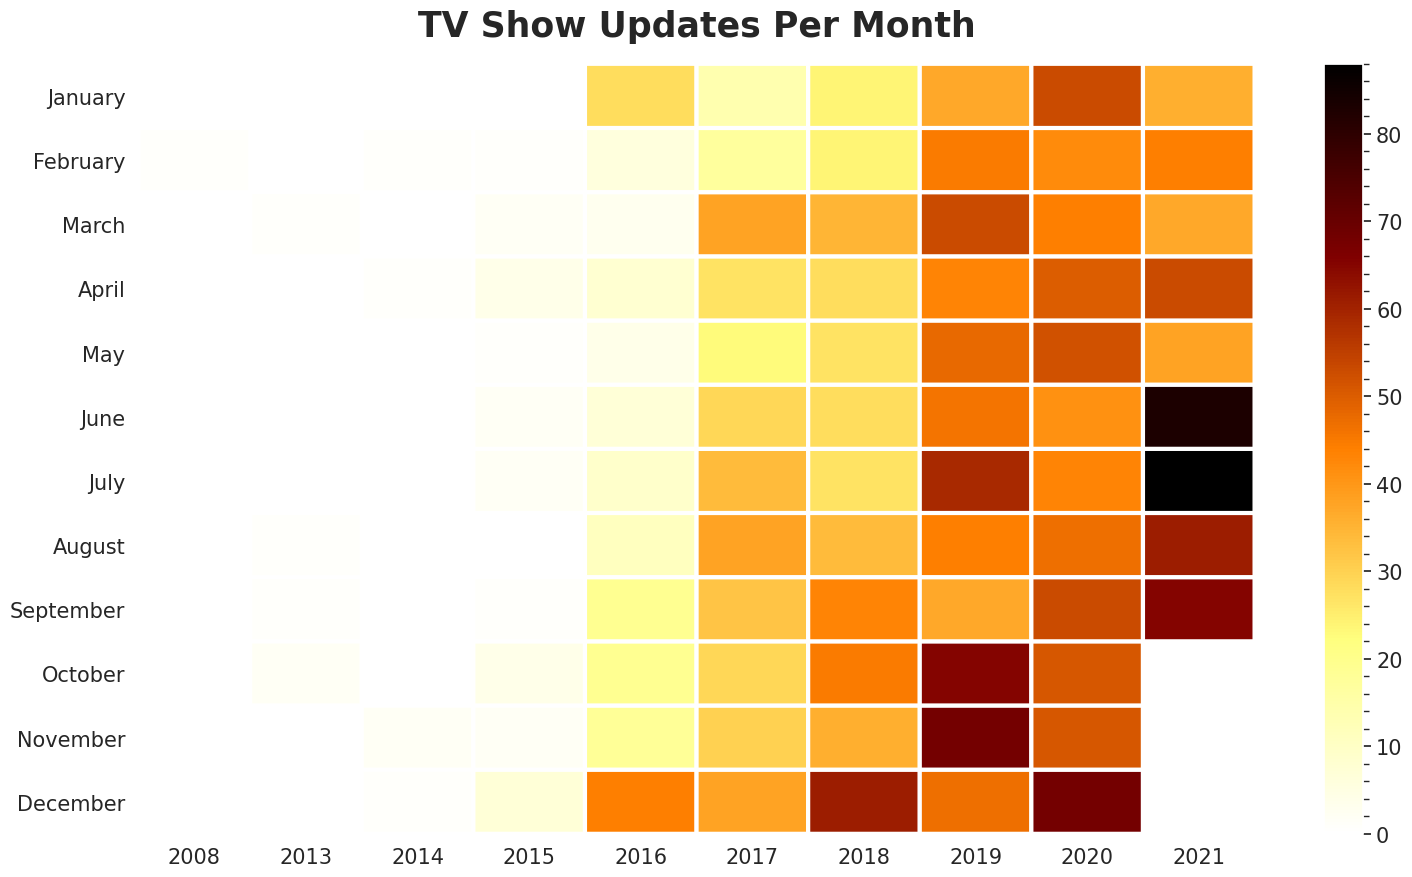

In [15]:
netflix_shows = Netflix[Netflix["type"] == "TV Show"]
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])

# string = "   Septemper 25, 2002"
# print(string.lstrip())
# Returns "Septemper 25, 2002" without spaces in left.

netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(18, 10), dpi=100)
plt.title("TV Show Updates Per Month", fontsize=25, fontweight="bold", pad=20)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=15)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=15)

# Heatmap
plt.pcolor(df, cmap='afmhot_r', edgecolor='white', linewidths=3)

# Color Bar on left side
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
cbar.ax.minorticks_on()

# Incase MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() occurs
plt.rcParams['axes.grid'] = False
plt.show()

## Year-wise Analysis

/tmp/ipython-input-3788556167.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts(ascending=False).index[0:15])


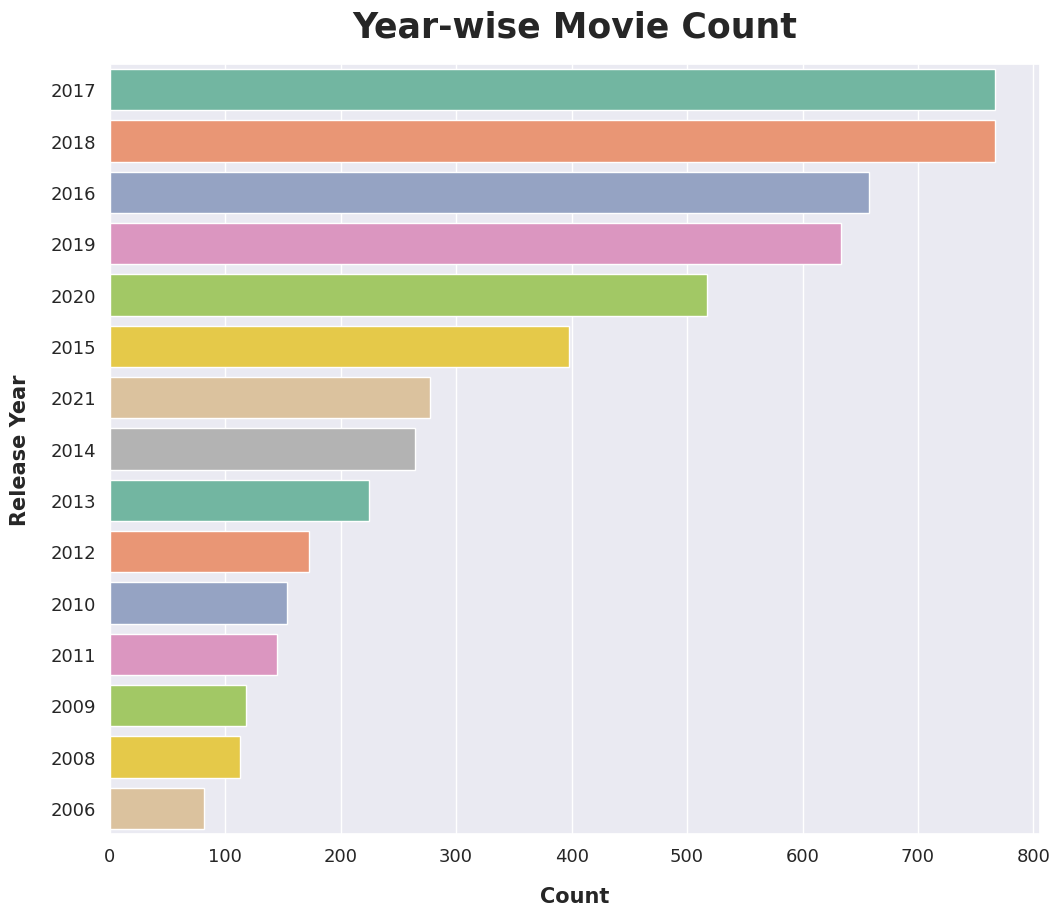

In [16]:
netflix_movies = Netflix[Netflix["type"] == "Movie"]
plt.figure(figsize=(12,10), dpi=100)
sns.set(style="darkgrid")
sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts(ascending=False).index[0:15])
plt.title("Year-wise Movie Count", fontsize=25, fontweight="bold", position=(0.5, 1), pad=20)
plt.xlabel("Count", fontsize=15, fontweight="bold", labelpad=15)
plt.ylabel("Release Year", fontsize=15, fontweight="bold", labelpad=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

## Top 10 Movies Creating Countries

In [17]:
# Dictionary with three keys
# Dictionary1 = {'A': 'Geeks', 'B': 'For', 'C': 'Geeks'}
# Printing keys of dictionary
# print(Dictionary1.keys())
# dict_values(['Geeks', 'For', 'Geeks'])

countries = {}
netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')
cou = list(netflix_movies['country'])
for i in cou:
    # print(i)
    i = list(i.split(','))
    if len(i) == 1:
        # print(i)
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

# print(countries)
# {'United States': 1, 'Unknown': 1, ' Burkina Faso': 1, ' United Kingdom': 152, ' Germany': 104}

/tmp/ipython-input-1116861018.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')


In [18]:
countries_fin = {}
for country, num in countries.items():
    # country = country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country] += num
    else:
        countries_fin[country] = num

# print(countries_fin)
countries_fin = {key: val for key, val in sorted(countries_fin.items(), key=lambda item: item[1], reverse=True)}
# print(countries_fin)

/tmp/ipython-input-3612958207.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(countries_fin.keys())[0:10], rotation=20)


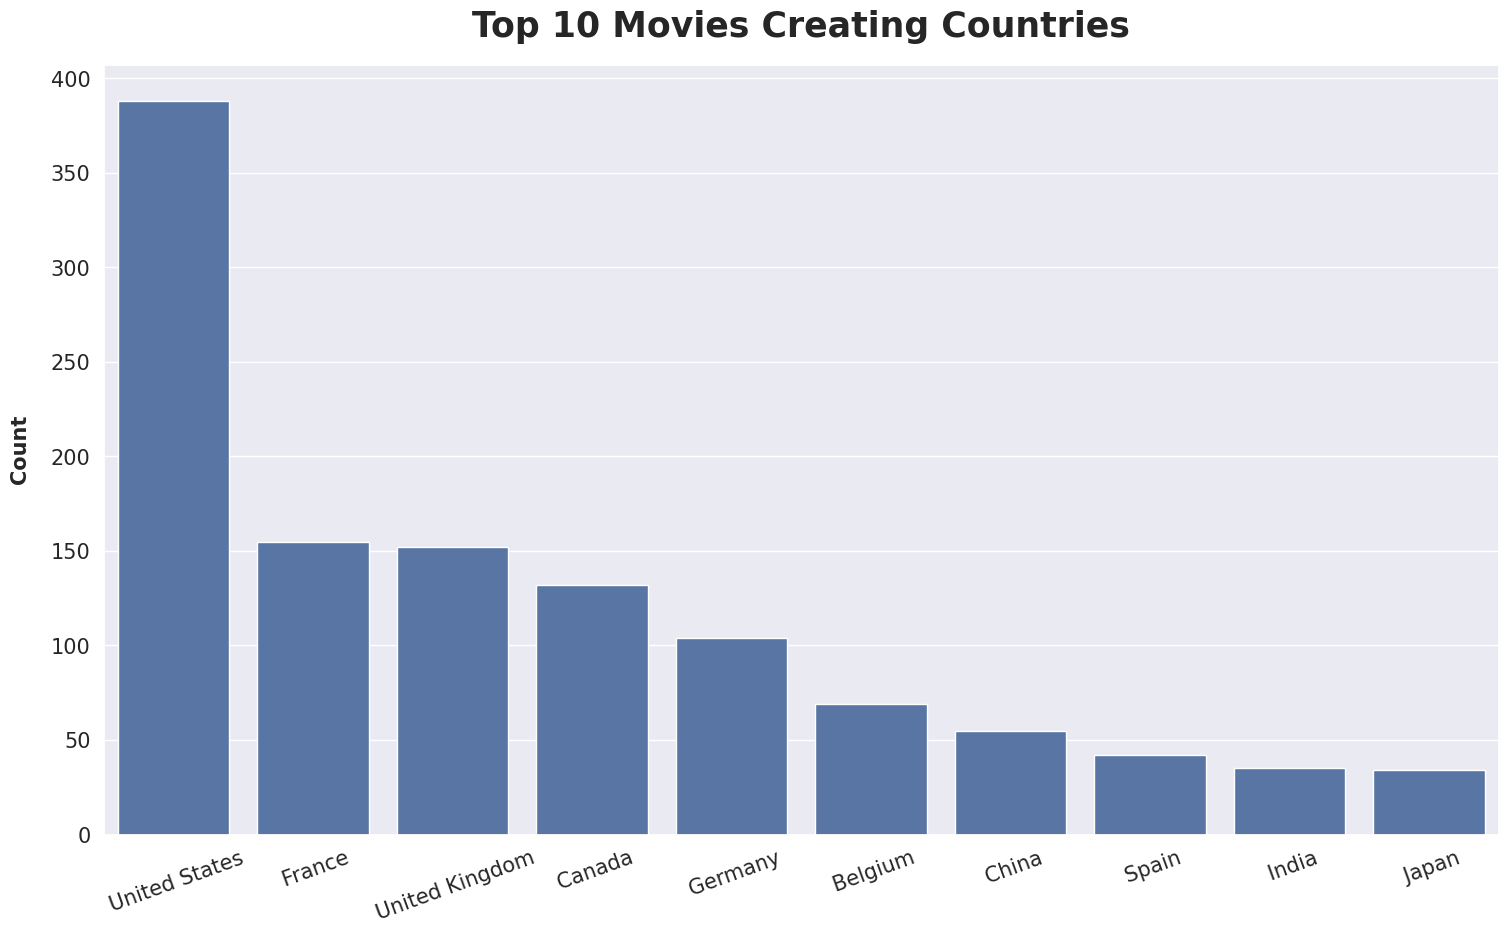

In [19]:
plt.figure(figsize=(18, 10), dpi=100)
plt.title("Top 10 Movies Creating Countries", fontsize=25, fontweight="bold", position=(0.5, 1), pad=20)
plt.ylabel("Count", fontsize=15, fontweight="bold", labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax = sns.barplot(x=list(countries_fin.keys())[0:10], y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10], rotation=20)
plt.show()

## Top 10 TV Shows Creating Countries

In [20]:
netflix_shows['country'].head()

,country
1,South Africa
2,NaN
3,NaN
4,India
5,NaN


In [21]:
countries1 = {}
netflix_shows['country'] = netflix_shows['country'].fillna('Unknown')
cou1 = list(netflix_shows['country'])
for i in cou1:
    # print(i)
    i = list(i.split(','))
    if len(i) == 1:
        # print(i)
        if i in list(countries1.keys()):
            countries1[i] += 1
        else:
            countries1[i[0]] = 1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j] += 1
            else:
                countries1[j] = 1

/tmp/ipython-input-2003169841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_shows['country'] = netflix_shows['country'].fillna('Unknown')


In [22]:
countries_fin1 = {}
for country, num in countries1.items():
    # country = country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country] += num
    else:
        countries_fin1[country] = num

# print(countries_fin)
countries_fin1 = {key: val for key, val in sorted(countries_fin1.items(), key=lambda item: item[1], reverse=True)}
# print(countries_fin)

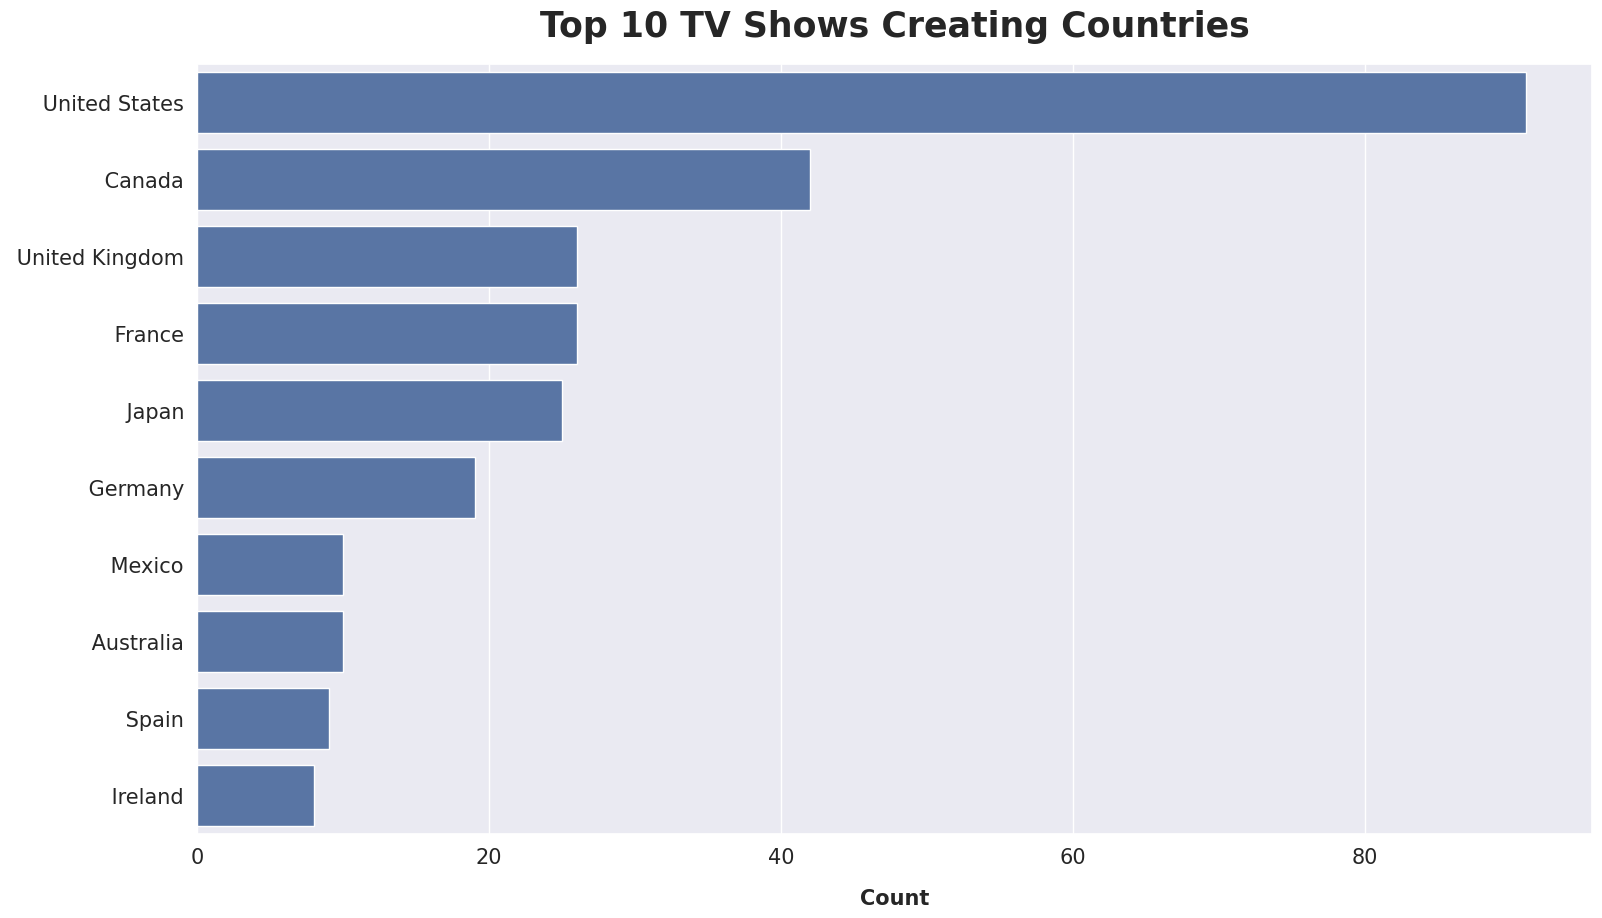

In [23]:
plt.figure(figsize=(18, 10), dpi=100)
plt.title("Top 10 TV Shows Creating Countries", fontsize=25, fontweight="bold", position=(0.5, 1), pad=20)
plt.xlabel("Count", fontsize=15, fontweight="bold", labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.barplot(y=list(countries_fin1.keys())[0:10], x=list(countries_fin1.values())[0:10])
plt.show()

## Analysis of Duration of Movies

In [24]:
netflix_movies = Netflix[Netflix["type"] == "Movie"]

# To avoid SettingWithCopyWarning
pd.options.mode.chained_assignment = None

netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')
netflix_movies['duration'] = netflix_movies['duration'].astype(float)
# print(netflix_movies['duration'])

/tmp/ipython-input-374120856.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=netflix_movies['duration'], shade=True, color="b")


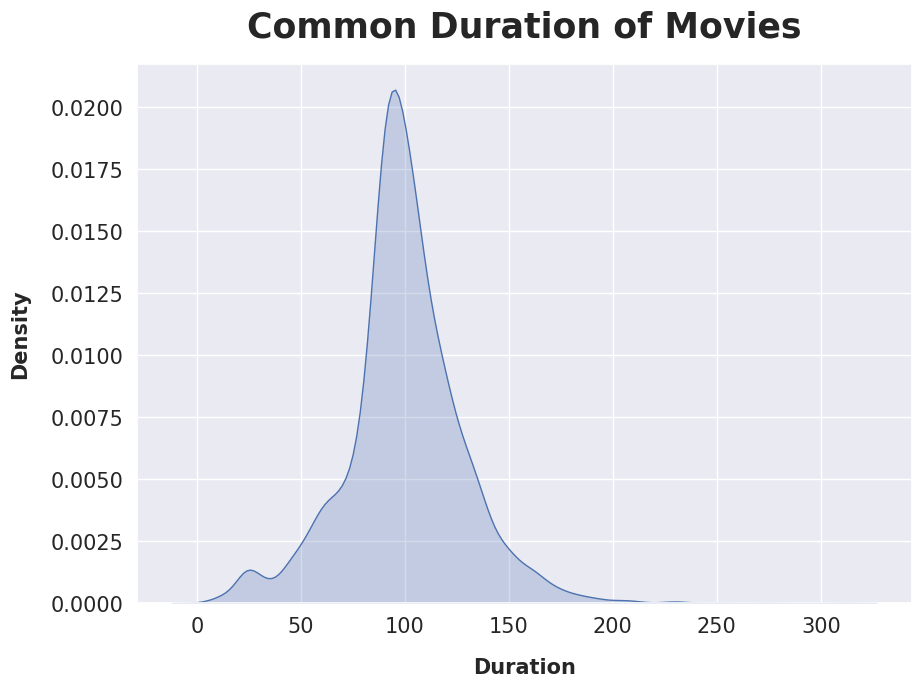

In [25]:
plt.figure(figsize=(10, 7), dpi=100)
plt.title("Common Duration of Movies", fontsize=25, fontweight="bold", pad=20)
plt.xlabel("Duration", fontsize=15, fontweight="bold", labelpad=15)
plt.ylabel("Density", fontsize=15, fontweight="bold", labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True, color="b")
plt.show()

## WordCloud for Genres in Movies & TV Shows

In [26]:
from collections import Counter

# a = ["a", "a", "b", "c", "c"]
# b = Counter(a)
# print(b) returns Counter({'a': 2, 'c': 2, 'b': 1})

genres = list(netflix_movies['listed_in'])
gen = []
for i in genres:
    i = list(i.split(','))
    for j in i:
        j = j.replace("'", '')
        gen.append(j.replace(' ',""))
g = Counter(gen)
g

Counter({'Documentaries': 869,
         'Children&FamilyMovies': 641,
         'Dramas': 2427,
         'IndependentMovies': 756,
         'InternationalMovies': 2752,
         'Comedies': 1674,
         'Thrillers': 577,
         'RomanticMovies': 616,
         'Music&Musicals': 375,
         'HorrorMovies': 357,
         'Sci-Fi&Fantasy': 243,
         'Action&Adventure': 859,
         'ClassicMovies': 116,
         'AnimeFeatures': 71,
         'SportsMovies': 219,
         'CultMovies': 71,
         'Faith&Spirituality': 65,
         'LGBTQMovies': 102,
         'Stand-UpComedy': 343,
         'Movies': 57})

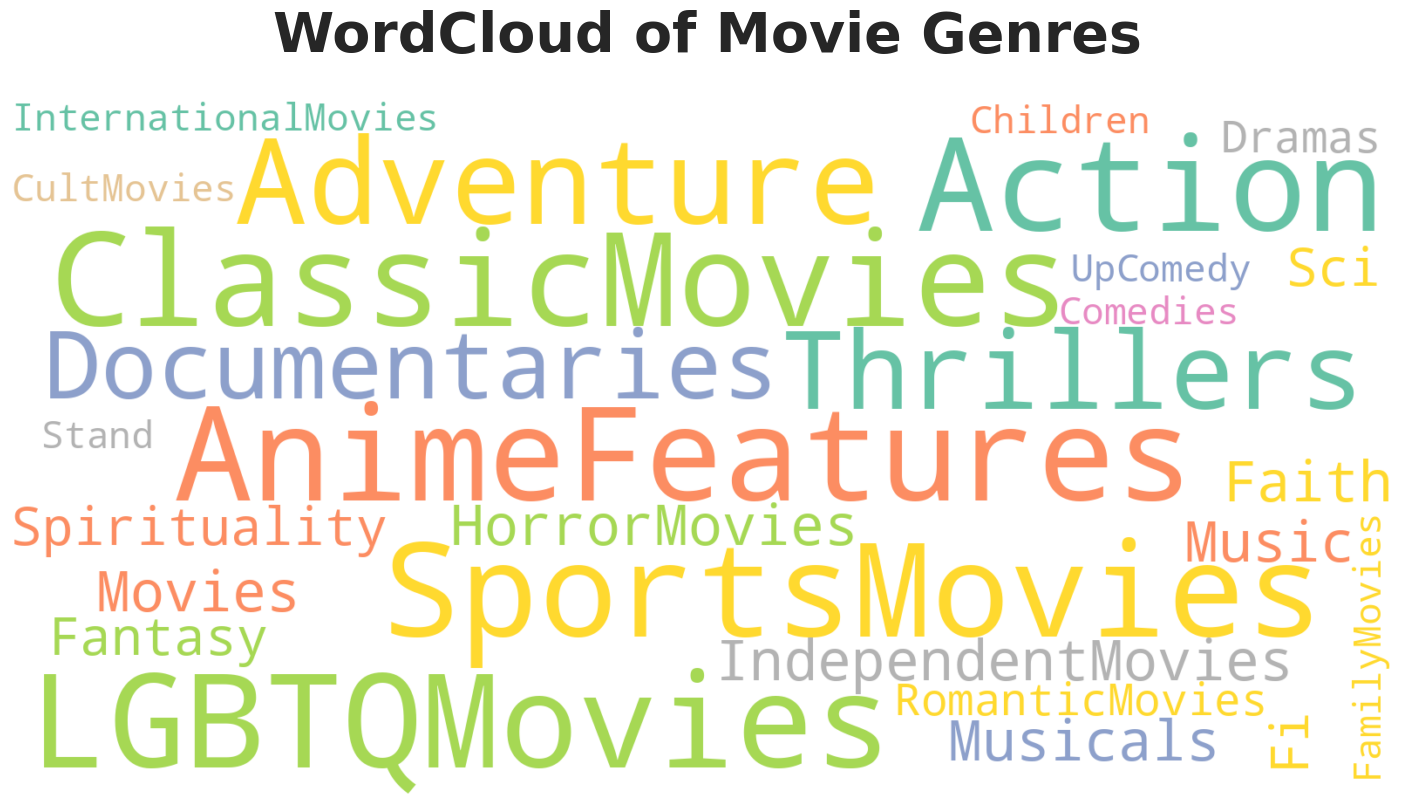

In [28]:
from wordcloud import WordCloud
from PIL import Image

text = list(set(gen))

plt.figure(figsize=(18, 10), dpi=100)
plt.title("WordCloud of Movie Genres", fontsize=40, fontweight="bold", pad=35)


#assigning shape to the word cloud
mask = np.array(Image.open('logo.png'))
wordcloud = WordCloud(max_words=1000,background_color="white", mask=mask, colormap='Set2', max_font_size=150).generate(str(text).replace("'", ''))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
from collections import Counter

# a = ["a", "a", "b", "c", "c"]
# b = Counter(a)
# print(b) returns Counter({'a': 2, 'c': 2, 'b': 1})

genres = list(netflix_shows['listed_in'])
gen = []
for i in genres:
    i = list(i.split(','))
    for j in i:
        j = j.replace("'", '')
        gen.append(j.replace(' ',""))
g = Counter(gen)

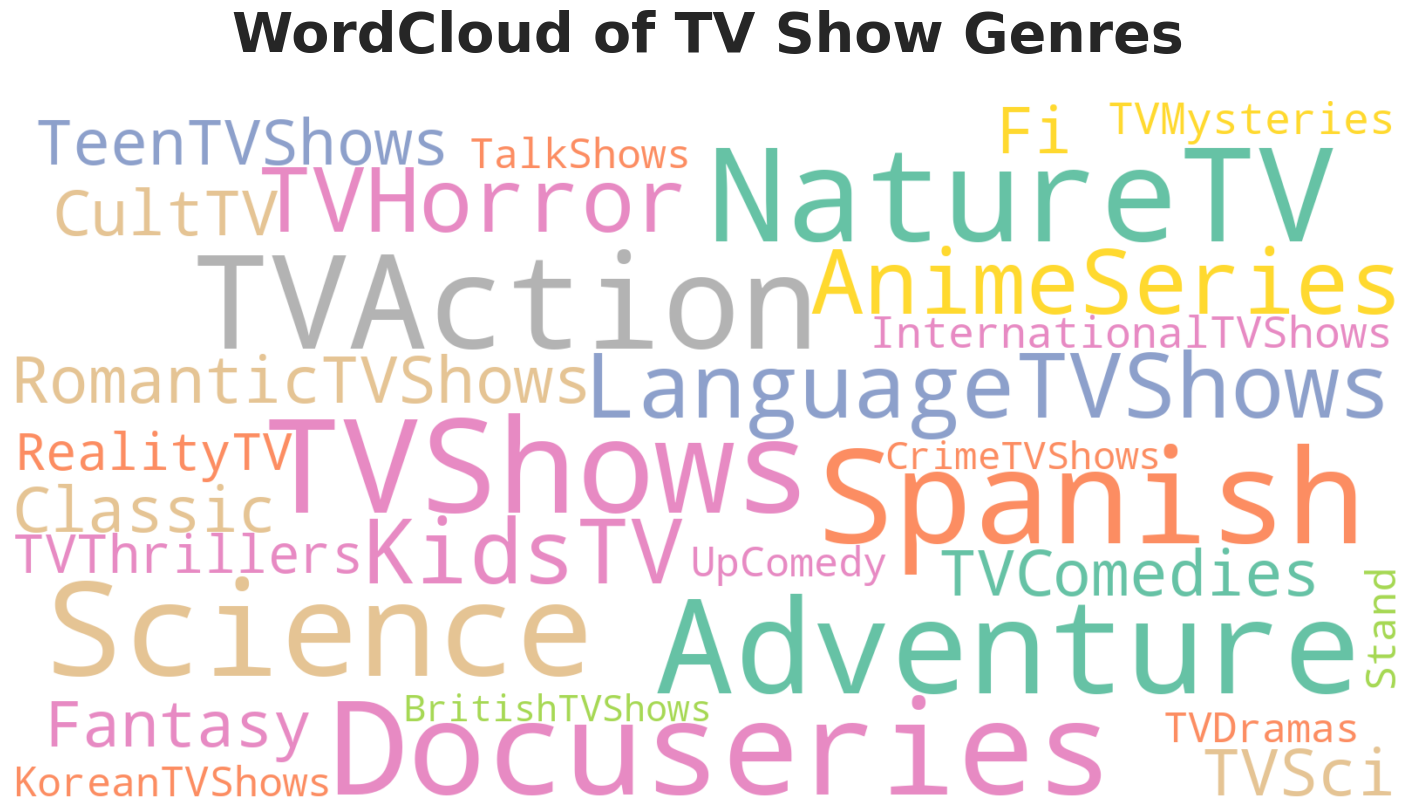

In [30]:
from wordcloud import WordCloud
from PIL import Image

text = list(set(gen))

plt.figure(figsize=(18, 10), dpi=100)
plt.title("WordCloud of TV Show Genres", fontsize=40, fontweight="bold", pad=35)


#assigning shape to the word cloud
mask = np.array(Image.open('logo.png'))
wordcloud = WordCloud(max_words=1000,background_color="white", mask=mask, colormap='Set2', max_font_size=150).generate(str(text).replace("'", ''))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##  Count of Genres

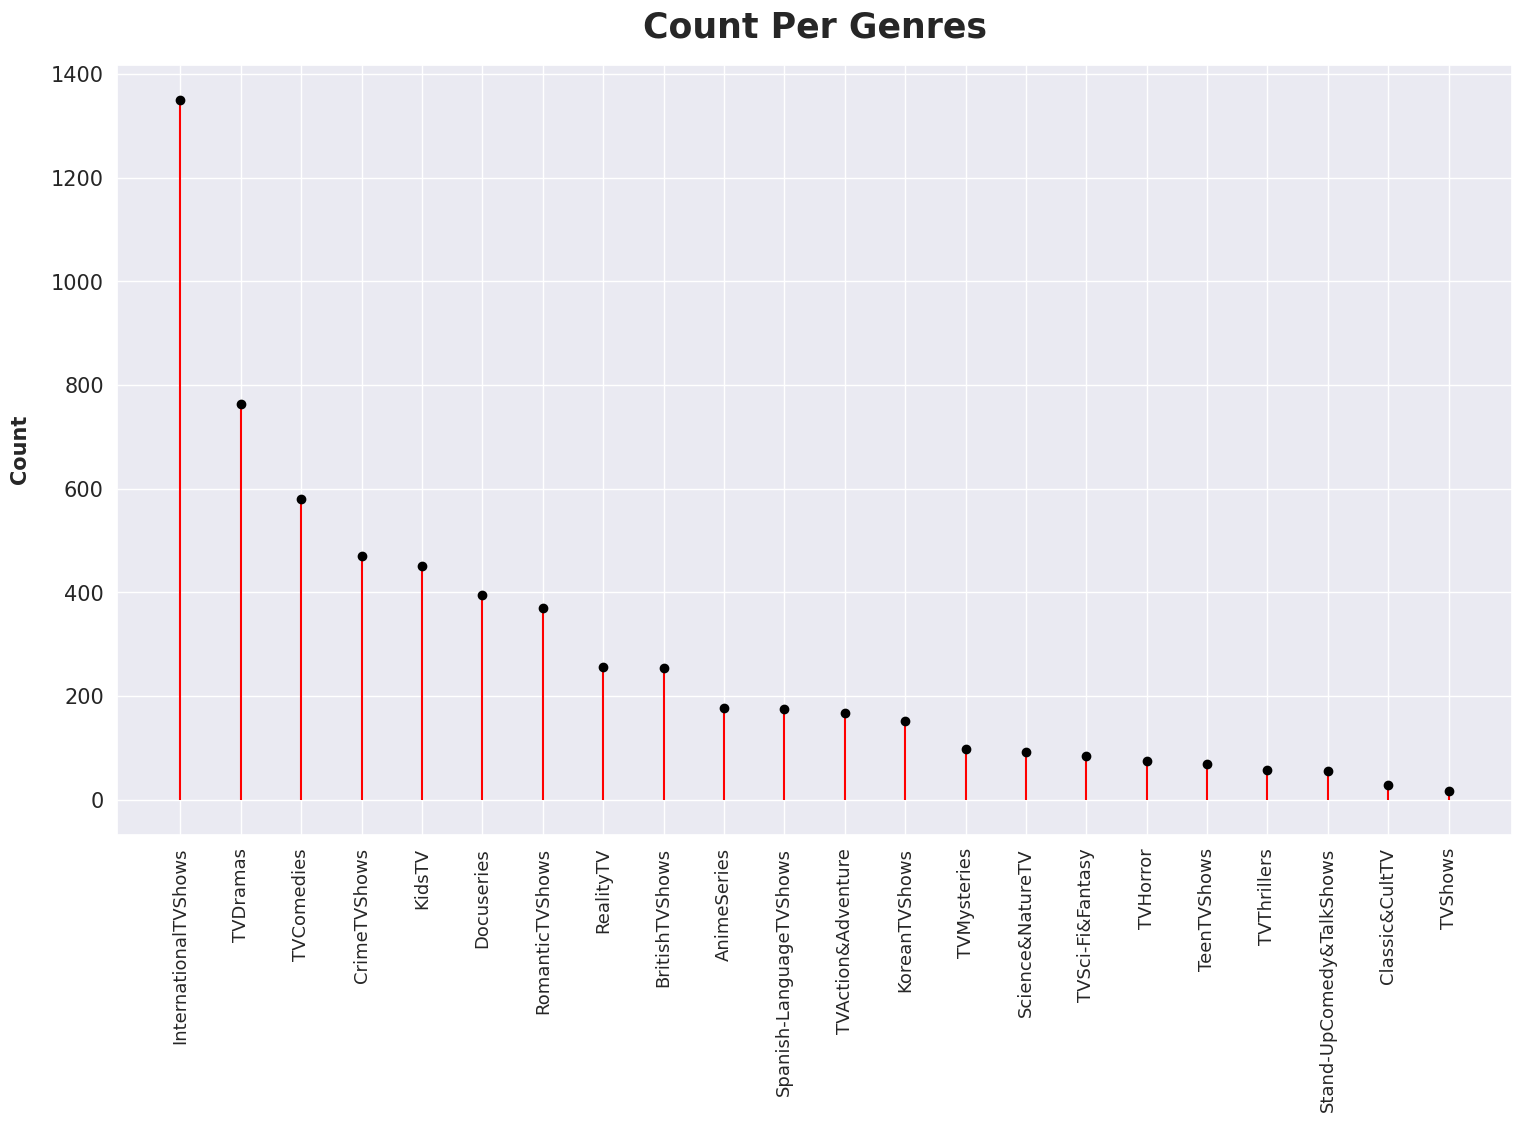

In [31]:
g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


plt.figure(figsize=(18, 10), dpi=100)
plt.title("Count Per Genres", fontsize=25, fontweight="bold", pad=20)
plt.ylabel("Count", fontsize=15, fontweight="bold", labelpad=15)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=15)


x = list(g.keys())
y = list(g.values())
plt.vlines(x, ymin=0, ymax=y, color='red')
plt.plot(x, y, "o", color='black')
plt.show()

## TV Shows With Largest Number of Seasons

In [32]:
netflix_shows = Netflix[Netflix["type"] == "TV Show"]
features = ['title', 'duration']
durations = netflix_shows[features]

durations['no_of_seasons'] = durations['duration'].str.replace(' Season', '')
durations.head()

,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2s
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2s
5,Midnight Mass,1 Season,1


In [33]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons']=durations['no_of_seasons'].astype(int)
durations.head()

,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1


In [34]:
t = ['title', 'no_of_seasons']
top = durations[t]
top = top.sort_values(by='no_of_seasons', ascending=False)

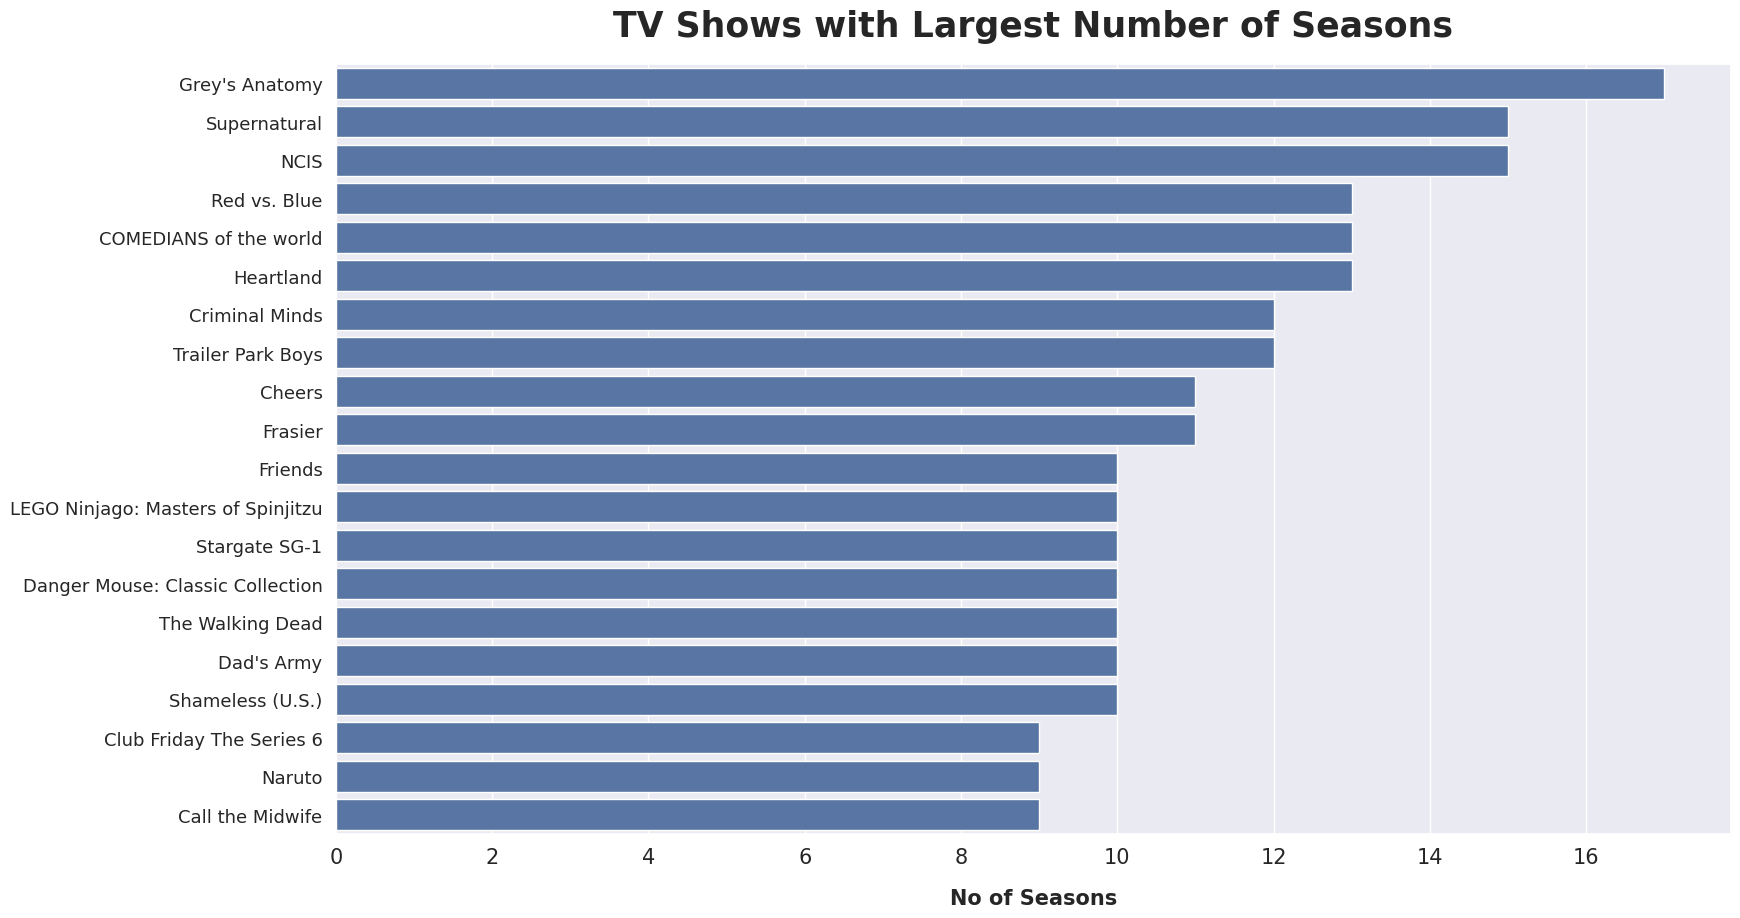

In [35]:
plt.figure(figsize=(18, 10), dpi=100)
plt.title("TV Shows with Largest Number of Seasons", fontsize=25, fontweight="bold", pad=20)
plt.xlabel("No of Seasons", fontsize=15, fontweight="bold", labelpad=15)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=13)

top20 = top[0:20]
sns.barplot(y=list(top20['title']), x=list(top20['no_of_seasons']))
#  color=(0.2, 0.4, 0.6, 0.6) R, G, B & Transparency as 4 tuple
plt.show()

## Oldest US TV Shows on Netflix

In [36]:
us_series_data = netflix_shows[netflix_shows['country']=='United States']
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

In [37]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],
                                           fill_color='#B5EAEA',
                                           align='center',
                                           line_color='white',
                                           font_size=15,
                                           font=dict(color='black', size=15),
                                           height=25),
                               cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],
                                          fill_color='#FFBCBC',
                                          align="center",
                                          height=23))])

fig.update_layout(width=1000, height=700)
fig.show()

## Latest US TV Shows on Netflix

In [38]:
us_series_data = netflix_shows[netflix_shows['country']=='United States']
oldest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:20]

In [39]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],
                                           fill_color='#B5EAEA',
                                           align='center',
                                           line_color='white',
                                           font_size=15,
                                           font=dict(color='black', size=15),
                                           height=25),
                               cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],
                                          fill_color='#FFBCBC',
                                          align="center",
                                          height=23))])

fig.update_layout(width=1000, height=700)
fig.show()